In [1]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from kmeans import *
from tf_idf import *
from data import *
import pandas as pd
import numpy as np
from rfm import *

In [2]:
df = load_data()

In [3]:
stock_rfm = rfm(df)
stock_rfm.head(10)

,CustomerID,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,cate_7,cate_8,cate_9
0,17850,34,372,5391.21,118.80,2370.11,101.76,0.00,0.0,0.0,413.58,2386.96,0.0
1,13047,9,56,3232.59,21.00,2623.36,0.00,239.55,0.0,0.0,0.00,348.68,0.0
2,12583,15,2,6705.38,68.00,6561.54,60.84,0.00,0.0,0.0,0.00,15.00,0.0
3,13748,5,95,948.25,0.00,933.25,0.00,0.00,0.0,0.0,0.00,15.00,0.0
4,15100,3,333,876.00,0.00,876.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0
5,15291,14,25,4623.30,0.00,3392.06,0.00,347.50,0.0,0.0,13.00,870.74,0.0
6,14688,21,7,5579.10,0.82,4739.28,0.00,220.00,0.0,0.0,179.18,439.82,0.0
7,17809,12,16,5411.91,3.15,4698.36,0.00,270.00,0.0,0.0,0.00,440.40,0.0
8,15311,91,0,60632.75,1138.20,45359.89,576.27,1911.58,0.0,0.0,2313.24,9333.57,0.0
9,16098,7,87,2005.63,16.15,1944.96,0.00,0.00,0.0,0.0,0.00,44.52,0.0


In [5]:
matrix = rfm_matrix(stock_rfm)
sse, sscore, test_range = kmeans(matrix)

Clusters = 2 ,Silhouette Score = 0.69591
Clusters = 3 ,Silhouette Score = 0.60285
Clusters = 4 ,Silhouette Score = 0.489
Clusters = 5 ,Silhouette Score = 0.50738
Clusters = 6 ,Silhouette Score = 0.4931
Clusters = 7 ,Silhouette Score = 0.44115
Clusters = 8 ,Silhouette Score = 0.46149
Clusters = 9 ,Silhouette Score = 0.47212
Clusters = 10 ,Silhouette Score = 0.46697
Clusters = 11 ,Silhouette Score = 0.38941
Clusters = 12 ,Silhouette Score = 0.37618
Clusters = 13 ,Silhouette Score = 0.45909
Clusters = 14 ,Silhouette Score = 0.4009


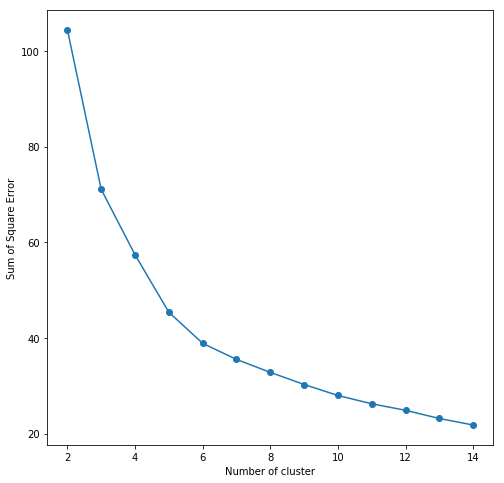

In [6]:
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

In [7]:
clusters = kmeans(matrix = matrix, cluster_num = 5, score = sscore[5] )
len(clusters)

4322

In [9]:
stock_rfm = rfm_write_back(stock_rfm,clusters) 
stock_rfm.head(10)

,CustomerID,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,cate_7,cate_8,cate_9,Group
0,17850,34,372,5391.21,118.80,2370.11,101.76,0.00,0.0,0.0,413.58,2386.96,0.0,0
1,13047,9,56,3232.59,21.00,2623.36,0.00,239.55,0.0,0.0,0.00,348.68,0.0,1
2,12583,15,2,6705.38,68.00,6561.54,60.84,0.00,0.0,0.0,0.00,15.00,0.0,3
3,13748,5,95,948.25,0.00,933.25,0.00,0.00,0.0,0.0,0.00,15.00,0.0,1
4,15100,3,333,876.00,0.00,876.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0
5,15291,14,25,4623.30,0.00,3392.06,0.00,347.50,0.0,0.0,13.00,870.74,0.0,3
6,14688,21,7,5579.10,0.82,4739.28,0.00,220.00,0.0,0.0,179.18,439.82,0.0,3
7,17809,12,16,5411.91,3.15,4698.36,0.00,270.00,0.0,0.0,0.00,440.40,0.0,3
8,15311,91,0,60632.75,1138.20,45359.89,576.27,1911.58,0.0,0.0,2313.24,9333.57,0.0,4
9,16098,7,87,2005.63,16.15,1944.96,0.00,0.00,0.0,0.0,0.00,44.52,0.0,1


In [ ]:
_rfm.groupby('Group', as_index = False)['CustomerID'].count()